In [397]:
# Les ressources qui vont bien 
# https://pandas.pydata.org/pandas-docs/stable/user_guide/visualization.html
# https://pandas.pydata.org/pandas-docs/stable/reference/frame.html
# https://medium.com/jbennetcodes/dealing-with-datetimes-like-a-pro-in-pandas-b80d3d808a7f
# https://stackoverflow.com/questions/22898824/filtering-pandas-dataframes-on-dates

# Always import python libraries before any others
# This is a convention
from pathlib import Path

import pandas as pd
import matplotlib.pyplot as plt

# Commande magique permettant d'utiliser matplotline de 
# génerer les graph dans jupyter
%matplotlib inline


# Load dataset using pandas
data_path = Path("C:/Users/MarieEtMax/jupy-notebooks/data/transportmaritime.csv")
df = pd.read_csv(data_path, sep=";")

# maintenant qu'on a nos données, on a envie de les cleaner un peu
# On retire les éventuelles lignes avec des valeurs manquantes
df.dropna(inplace=True)

# Par simplification, on renomme une des colonnes
df = df.rename(columns={'nb_passagers':'nb_pass'}, index={'CIVITA VECCHIA':'Civita Vecchia'})

# Puis on change le type str de la clonne date vers un vrai type de date !
df['date'] = pd.to_datetime(df['date'])

# Puis on vire les float pour en faire des int
df['nb_pass'] = df['nb_pass'].astype(int)



In [374]:
# Ici, on compte le nombre de passager par port et par année !

# Les deux fonctions qui suivent sont relativement équivalentes
# type(df.groupby(['port', 'date']).agg({'sum'}, axis='index').sort_values(by=('nb_pass', 'sum'), ascending=False))

graph2 = df.groupby(['port', 'date']).sum().sort_values(by='nb_pass', ascending=False)

                nb_pass
port                   
Ajaccio         4729301
Bastia          9825369
Bonifacio       1032079
Civita Vecchia     7494
Calvi            717501
Genes            741383
Golgo Aranci        423
L'Ile Rousse    1494099
Livourne        2557411
Marseille       3983198
Nice            3777730
Palau                 0
Piombino          35207
Porto Ferraio         0
Porto Torres      32050
Porto-Vecchio    497385
Propriano        407659
Santa Teresa    1032169
Savona          1310298
Toulon          5224998


<BarContainer object of 20 artists>

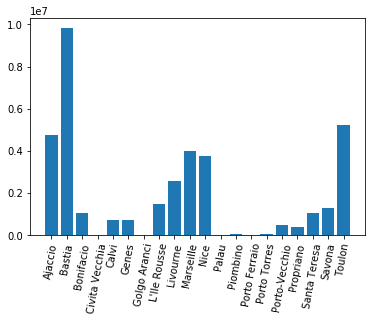

In [400]:
# Ici, je veux un graphique en histogramme me montrant :
# le total cumulé de tous les passagers de ces 10 dernières années

# On commence par choper uniquement les 10 dernières années
# Pas compris comment on utilise les pd.tseries.offsets.YearBegin(10)
graph1 = df[(df['date'] > '2009.1.1')]

# On chope la somme de tous les passagers, puis on vire le upper case de merde
graph1 = graph1[['port', 'nb_pass']].groupby(['port']).sum()
graph1.rename(index={'CIVITA VECCHIA':'Civita Vecchia'}, inplace=True)

print(graph1)

# Petit tricks https://re-thought.com/how-to-suppress-scientific-notation-in-pandas/

plt.xticks(rotation=80)
plt.bar(graph1.index.tolist(), height=graph1.nb_pass)
#graph1.plot.bar(width=0.7)


In [303]:
# Ici, je veux un graphique qui montre l'évolution des passagers, avec :
# les ports en index, le nombre de passagers en y, les années en x

In [157]:
#start_date = df['date'] - pd.tseries.offsets.YearBegin(5)
#print(start_date)

#print(df['date'])
df[('date' > pd.tseries.offsets.YearBegin(10))]
#pd.tseries.offsets.YearBegin(10)

TypeError: '>' not supported between instances of 'str' and 'YearBegin'